<a href="https://colab.research.google.com/github/vinodnbhat/AIML-CEP-2021-Assignments/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle

In [3]:
import matplotlib.animation as animation
from IPython.display import HTML

**GENERIC PERCEPTRON LEARNING ALGORITHM**

In [11]:
def perceptron_train(initial_w, X, Y, max_epochs):
  weights_updates = []
  points_updates = []

  epoch = 0
  num_updates_in_each_epoch = 0

  w = initial_w

  while epoch < max_epochs:
    num_updates_in_each_epoch = 0
    X, Y = shuffle(X, Y)
    for x, y in zip(X, Y):
      if y*np.dot(w, x) < 0:
        w = w + y*x
        weights_updates.append(w)
        points_updates.append(x)
        num_updates_in_each_epoch += 1
    epoch += 1
    print('After {0} epochs, num updates in each epoch = {1}, total updates = {2}'.format(epoch, num_updates_in_each_epoch, len(weights_updates)))
  print('Perceptron algo complete! Weights updated', len(weights_updates), 'no of times')
  return w, weights_updates, points_updates

**Linearly Separable Data**

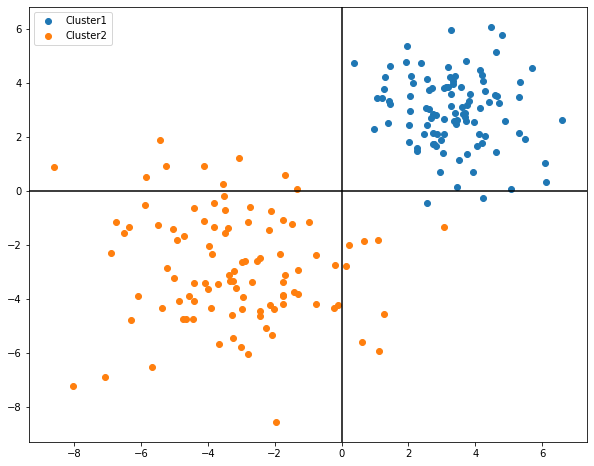

In [12]:
n = 100
np.random.seed(1)

mean1 = [3, 3]
cov1 = [[2, 0], [0, 2]]
cluster_1 = np.random.multivariate_normal(mean1, cov1, n)

mean2 = [-3, -3]
cov2 = [[4, 0], [0, 4]]
cluster_2 = np.random.multivariate_normal(mean2, cov2, n)

cl1_y = np.ones(n)
cl2_y = -cl1_y

X = np.concatenate((cluster_1, cluster_2), axis = 0)
Y = np.concatenate((cl1_y, cl2_y), axis = 0)

cl1_x1, cl1_x2 = cluster_1.T
cl2_x1, cl2_x2 = cluster_2.T

plt.figure(figsize = (10, 8))
plt.scatter(cl1_x1, cl1_x2, label = 'Cluster1')
plt.scatter(cl2_x1, cl2_x2, label = 'Cluster2')
plt.axvline(x = 0, color = 'black')
plt.axhline(y = 0, color = 'black')
plt.legend(loc = 2)
plt.show()

**Perceptron Without Threshold**

In [13]:
np.random.seed(1000)
initial_w = np.random.rand(2)

size = len(Y)
updates = []
points = []

epoch = 0

max_epochs = 10
num_updates_in_each_epoch = 0

w, weights, points = perceptron_train(initial_w, X, Y, max_epochs)

After 1 epochs, num updates in each epoch = 3, total updates = 3
After 2 epochs, num updates in each epoch = 1, total updates = 4
After 3 epochs, num updates in each epoch = 2, total updates = 6
After 4 epochs, num updates in each epoch = 2, total updates = 8
After 5 epochs, num updates in each epoch = 1, total updates = 9
After 6 epochs, num updates in each epoch = 2, total updates = 11
After 7 epochs, num updates in each epoch = 1, total updates = 12
After 8 epochs, num updates in each epoch = 2, total updates = 14
After 9 epochs, num updates in each epoch = 2, total updates = 16
After 10 epochs, num updates in each epoch = 0, total updates = 16
Perceptron algo complete! Weights updated 16 no of times


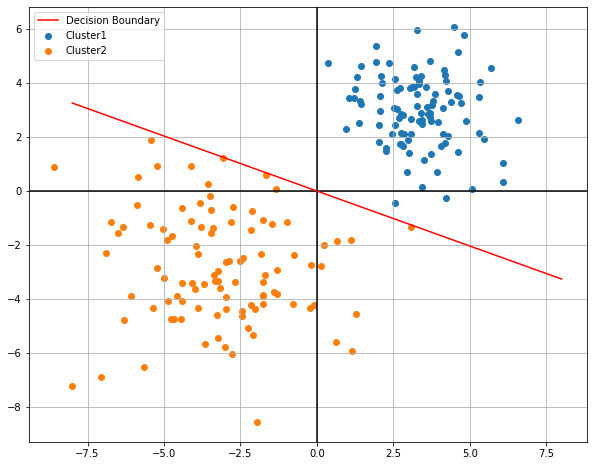

In [14]:
plt.figure(figsize = (10, 8))
plt.scatter(cl1_x1, cl1_x2, label = 'Cluster1')
plt.scatter(cl2_x1, cl2_x2, label = 'Cluster2')
plt.axvline(x = 0, color = 'black')
plt.axhline(y = 0, color = 'black')

x1 = np.linspace(-8, 8, 100)
x2 = (-w[0]/w[1]) * x1

plt.plot(x1, x2, '-r', label = 'Decision Boundary')

plt.legend(loc = 2)
plt.grid()
plt.show()

**Animation**

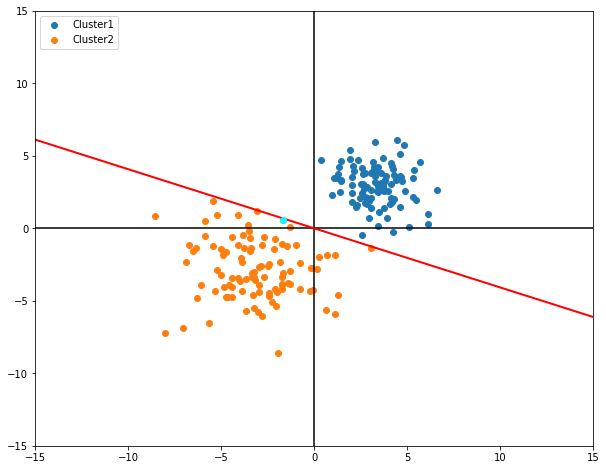

In [17]:
fig = plt.figure(figsize = (10, 8))
axis = plt.axes(xlim = (-15, 15), ylim = (-15, 15))
axis.scatter(cl1_x1, cl1_x2, label = 'Cluster1')
axis.scatter(cl2_x1, cl2_x2, label = 'Cluster2')
axis.axvline(x = 0, color = 'black')
axis.axhline(y = 0, color = 'black')
axis.legend(loc = 2)

line, = axis.plot([], [], lw = 2, color = 'red')
point, = axis.plot([], [], marker = 'o', color = 'cyan')

def init():
  line.set_data([], [])
  point.set_data([], [])
  return line, point

def animate(i):
  w = weights[i]
  x1data = np.linspace(-15, 15, 100)
  x2data = -(w[0]/w[1]) * x1data
  x1, x2 = points[i]
  point.set_data([x1], [x2])
  line.set_data(x1data, x2data)
  return line, point

anim1 = animation.FuncAnimation(fig, animate, init_func = init, frames = len(weights), interval = 1000, blit = True)

HTML(anim1.to_html5_video())

**Perceptron With threshold**

In [18]:
ones = np.ones((200, 1))
X_ = np.concatenate((X, ones), axis = 1)

np.random.seed(10)
initial_w_ = np.random.rand(3)

size_ = len(Y)
updates_ = []
weights_ = []

epoch_ = 10

max_epochs_ = 6
max_updates_in_each_epoch_ = 0

w_, weights_, points_ = perceptron_train(initial_w_, X_, Y, max_epochs_)

After 1 epochs, num updates in each epoch = 3, total updates = 3
After 2 epochs, num updates in each epoch = 1, total updates = 4
After 3 epochs, num updates in each epoch = 2, total updates = 6
After 4 epochs, num updates in each epoch = 1, total updates = 7
After 5 epochs, num updates in each epoch = 1, total updates = 8
After 6 epochs, num updates in each epoch = 0, total updates = 8
Perceptron algo complete! Weights updated 8 no of times


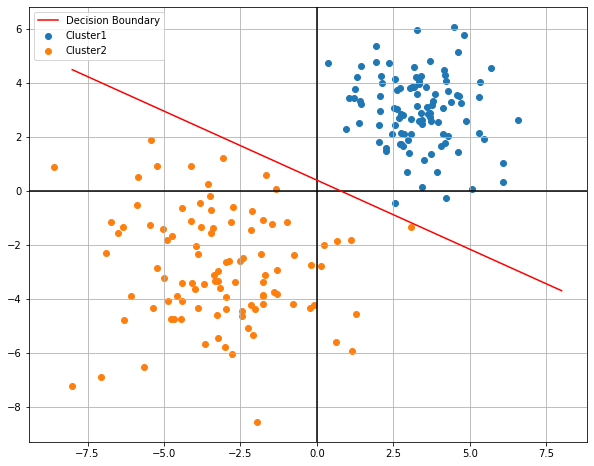

In [20]:
plt.figure(figsize = (10, 8))
plt.scatter(cl1_x1, cl1_x2, label = 'Cluster1')
plt.scatter(cl2_x1, cl2_x2, label = 'Cluster2')
plt.axvline(x = 0, color = 'black')
plt.axhline(y = 0, color = 'black')

x1 = np.linspace(-8, 8, 100)
x2 = (-w_[0]/w_[1]) * x1 - (w_[2]/w_[1])

plt.plot(x1, x2, '-r', label = 'Decision Boundary')

plt.legend(loc = 2)
plt.grid()
plt.show()

**Animation**

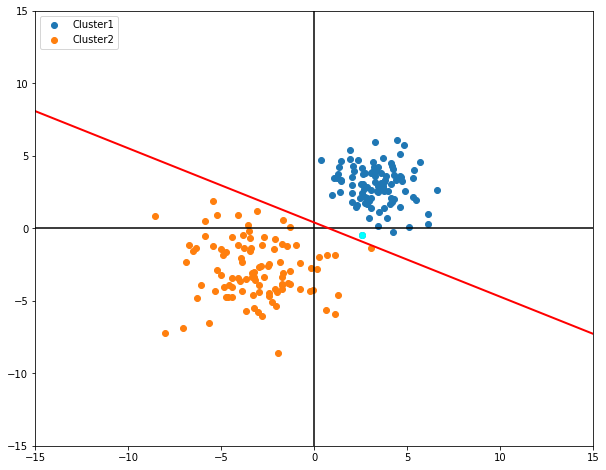

In [21]:
fig = plt.figure(figsize = (10, 8))
axis = plt.axes(xlim = (-15, 15), ylim = (-15, 15))
axis.scatter(cl1_x1, cl1_x2, label = 'Cluster1')
axis.scatter(cl2_x1, cl2_x2, label = 'Cluster2')
axis.axvline(x = 0, color = 'black')
axis.axhline(y = 0, color = 'black')
axis.legend(loc = 2)

line, = axis.plot([], [], lw = 2, color = 'red')
point, = axis.plot([], [], marker = 'o', color = 'cyan')

def init():
  line.set_data([], [])
  point.set_data([], [])
  return line, point

def animate(i):
  w = weights_[i]
  x1data = np.linspace(-15, 15, 100)
  x2data = -(w[0]/w[1]) * x1data - (w[2]/w[1])
  x1, x2 = points_[i][:2]
  point.set_data([x1], [x2])
  line.set_data(x1data, x2data)
  return line, point

anim1 = animation.FuncAnimation(fig, animate, init_func = init, frames = len(weights_), interval = 1000, blit = True)

HTML(anim1.to_html5_video())

**Non-Separable Data**

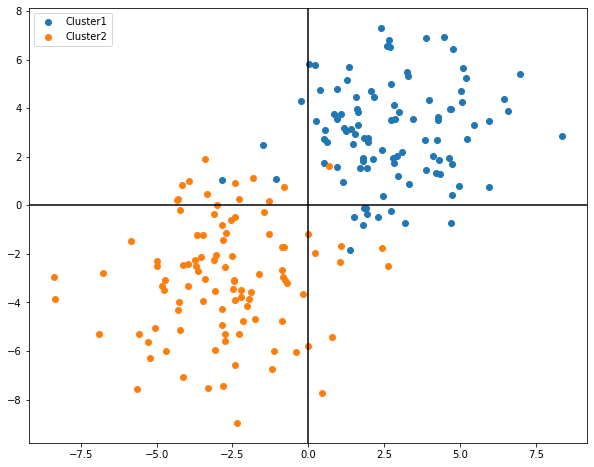

In [22]:
n = 100
np.random.seed(3)

mean1 = [3, 3]
cov1 = [[4, 0], [0, 4]]
cluster_1 = np.random.multivariate_normal(mean1, cov1, n)

mean2 = [-3, -3]
cov2 = [[4, 0], [0, 4]]
cluster_2 = np.random.multivariate_normal(mean2, cov2, n)

cl1_y = np.ones(n)
cl2_y = -cl1_y

X = np.concatenate((cluster_1, cluster_2), axis = 0)
Y = np.concatenate((cl1_y, cl2_y), axis = 0)

cl1_x1, cl1_x2 = cluster_1.T
cl2_x1, cl2_x2 = cluster_2.T

plt.figure(figsize = (10, 8))
plt.scatter(cl1_x1, cl1_x2, label = 'Cluster1')
plt.scatter(cl2_x1, cl2_x2, label = 'Cluster2')
plt.axvline(x = 0, color = 'black')
plt.axhline(y = 0, color = 'black')
plt.legend(loc = 2)
plt.show()

**Perceptron With Threshold**

In [23]:
ones = np.ones((200, 1))
X_ = np.concatenate((X, ones), axis = 1)

np.random.seed(3)
initial_w_ = np.random.rand(3)

size_ = len(Y)
updates_ = []
weights_ = []

epoch_ = 0

max_epochs_ = 50
max_updates_in_each_epoch_ = 0

w_, weights_, points_ = perceptron_train(initial_w_, X_, Y, max_epochs_)

After 1 epochs, num updates in each epoch = 8, total updates = 8
After 2 epochs, num updates in each epoch = 7, total updates = 15
After 3 epochs, num updates in each epoch = 7, total updates = 22
After 4 epochs, num updates in each epoch = 9, total updates = 31
After 5 epochs, num updates in each epoch = 7, total updates = 38
After 6 epochs, num updates in each epoch = 8, total updates = 46
After 7 epochs, num updates in each epoch = 6, total updates = 52
After 8 epochs, num updates in each epoch = 9, total updates = 61
After 9 epochs, num updates in each epoch = 6, total updates = 67
After 10 epochs, num updates in each epoch = 8, total updates = 75
After 11 epochs, num updates in each epoch = 7, total updates = 82
After 12 epochs, num updates in each epoch = 6, total updates = 88
After 13 epochs, num updates in each epoch = 7, total updates = 95
After 14 epochs, num updates in each epoch = 8, total updates = 103
After 15 epochs, num updates in each epoch = 11, total updates = 114
Af

**Animation**

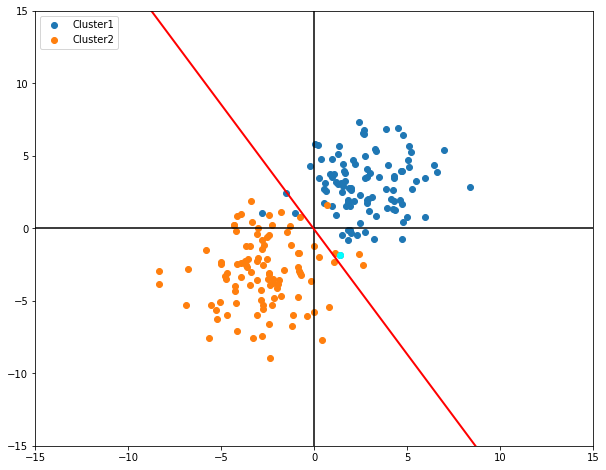

In [24]:
fig = plt.figure(figsize = (10, 8))
axis = plt.axes(xlim = (-15, 15), ylim = (-15, 15))
axis.scatter(cl1_x1, cl1_x2, label = 'Cluster1')
axis.scatter(cl2_x1, cl2_x2, label = 'Cluster2')
axis.axvline(x = 0, color = 'black')
axis.axhline(y = 0, color = 'black')
axis.legend(loc = 2)

line, = axis.plot([], [], lw = 2, color = 'red')
point, = axis.plot([], [], marker = 'o', color = 'cyan')

def init():
  line.set_data([], [])
  point.set_data([], [])
  return line, point

def animate(i):
  w = weights_[i]
  x1data = np.linspace(-15, 15, 100)
  x2data = -(w[0]/w[1]) * x1data - (w[2]/w[1])
  x1, x2 = points_[i][:2]
  point.set_data([x1], [x2])
  line.set_data(x1data, x2data)
  return line, point

anim1 = animation.FuncAnimation(fig, animate, init_func = init, frames = len(weights_), interval = 1000, blit = True)

HTML(anim1.to_html5_video())